In [1]:
import pandas as pd
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loansData=pd.read_csv('https://github.com/Thinkful-Ed/curric-data-001-data-sets/raw/master/loans/loansData.csv')
loansData.dropna(inplace=True)
loansData['FICO.Score']=loansData['FICO.Range'].str.split('-',expand=True).astype(int)[0]
loansData['Interest.Rate']=loansData['Interest.Rate'].str.strip('%').astype(float)
loansData['IR_TF']=[0 if x < 12 else 1 for x in loansData['Interest.Rate']]

In [3]:
loansData['Intercept']=1
ind_vars=['Amount.Funded.By.Investors','FICO.Score','Intercept']

In [4]:
logit=sm.Logit(loansData['IR_TF'],loansData[ind_vars])
result=logit.fit()
coeff=result.params
print(coeff)

Optimization terminated successfully.
         Current function value: 0.322737
         Iterations 8
Amount.Funded.By.Investors     0.000170
FICO.Score                    -0.085952
Intercept                     59.194610
dtype: float64


In [5]:
def logistic_function(FICO,LoanAmt,coeff):
    prob = 1/(1 + math.exp(coeff[2] + (coeff[1]*FICO) +(coeff[0]*LoanAmt)))
    return(round(prob,3))

In [6]:
logistic_function(720,10000,coeff)

0.728

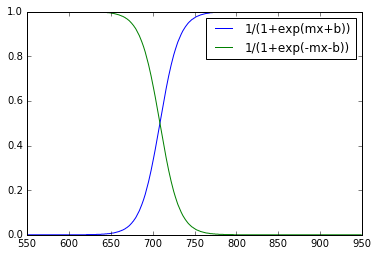

In [7]:
p1 = [logistic_function(x,10000,coeff) for x in range(550,950)]
p2 = [logistic_function(x,10000,-1*coeff) for x in range(550,950)]
plt.plot(range(550,950),p1)
plt.plot(range(550,950),p2)
plt.legend(['1/(1+exp(mx+b))','1/(1+exp(-mx-b))'])
plt.show()

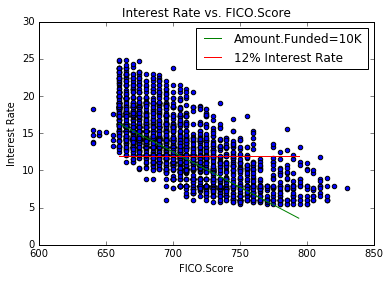

In [33]:
plt.scatter(loansData['FICO.Score'],loansData['Interest.Rate'])

IRate=loansData[loansData['Amount.Funded.By.Investors']==10000]['Interest.Rate']
FScore=loansData[loansData['Amount.Funded.By.Investors']==10000]['FICO.Score']
FScore=sm.add_constant(FScore)
model=sm.OLS(IRate,FScore)
results=model.fit()
mFScore=range(min(FScore['FICO.Score']),max(FScore['FICO.Score']))
mIRate=[float(results.params[0])+float(results.params[1])*x for x in mFScore]

plt.plot(mFScore,mIRate,'g-')
plt.plot(mFScore,[12]*len(mFScore),'r-')
plt.title('Interest Rate vs. FICO.Score')
plt.legend(['Amount.Funded=10K','12% Interest Rate'])
plt.xlabel('FICO.Score')
plt.ylabel('Interest Rate')

In [35]:
print((12.0-float(results.params[0]))/float(results.params[1]))

#The above graph shows the relationship between Interest Rate and FICO score if
#the loan amount is fixed at $10,000.  The relationship was created using a 
#linear regression.  Based on this regression, the FICO Score at 12% interest
#is approximately 705.  Therefore, it makes sense that a perso with a FICO Score
#of 720 would obtain a loan for $10,000.  The probability is only 72.8%
#which is barely above the limit set for the hypothesis test.  The hypothesis 
#is accepted but it may not be a guarantee.  There may be other variables
#that impact the decision being modeled such as demographics.

705.1845837764929
